In [105]:
ddir = '../opt tweez data/02_12_2014/2_12_2014_part3/'
files = list.files(ddir)
files

[1] "b3um_I1000mA_t50us_fs10kHz.txt" "b3um_I1000mA_t50us_fs12kHz.txt"
[3] "b3um_I1000mA_t50us_fs15kHz.txt" "b3um_I1000mA_t50us_fs17kHz.txt"
[5] "b3um_I1000mA_t50us_fs5kHz.txt"  "b3um_I1000mA_t50us_fs7kHz.txt"

In [106]:
# Linear part of the acf to include (indices)
linpart = 1:80

# Files to include (indices in array files)
#fidx = 1:length(files) # All
fidx = c(5, 6, 1, 2, 3, 4)

files[fidx]

# Frequencies of measurements
fps = c(1/10000, 1/12000, 1/15000, 1/17000, 1/5000, 1/7000); # 02_12_2014/2_12_2014_part3/

[1] "b3um_I1000mA_t50us_fs5kHz.txt"  "b3um_I1000mA_t50us_fs7kHz.txt" 
[3] "b3um_I1000mA_t50us_fs10kHz.txt" "b3um_I1000mA_t50us_fs12kHz.txt"
[5] "b3um_I1000mA_t50us_fs15kHz.txt" "b3um_I1000mA_t50us_fs17kHz.txt"

In [107]:
nfiles = length(fidx)

varx = vector(,nfiles)
vary = vector(,nfiles)
meanx = vector(,nfiles)
meany = vector(,nfiles)
kx = vector(,nfiles)
ky = vector(,nfiles)

In [108]:
# Loop through the files and calculate everything for each
for(k in 1:nfiles){
    tmp = read.table(paste(ddir,files[fidx[k]],sep=''),sep =';',dec = ',')
    coords = ts(tmp[,1:2])
    #coords = ts(tmp[,2:3])
    
    # Means and variances for x, y
    varx[k] = var(coords[,1])
    vary[k] = var(coords[,2])
    meanx[k] = mean(coords[,1])
    meany[k] = mean(coords[,2])
    
    # Autocorrelations for stiffness estimation
    acfx = acf(coords[,1], lag.max = 1000, plot=FALSE)
    acfy = acf(coords[,2], lag.max = 1000, plot=FALSE)
    
    logacfx = log(acfx$acf[linpart])
    logacfy = log(acfy$acf[linpart])

    # Calculate units for the acf 
    tau = seq(0, (length(linpart)-1)*fps[k], fps[k])
    
    # Linear fit 
    fitx = lm(logacfx ~ tau)
    fity = lm(logacfy ~ tau)
    
    stiffnessx[k] = -fitx$coefficients[2]
    stiffnessy[k] = -fity$coefficients[2]
}

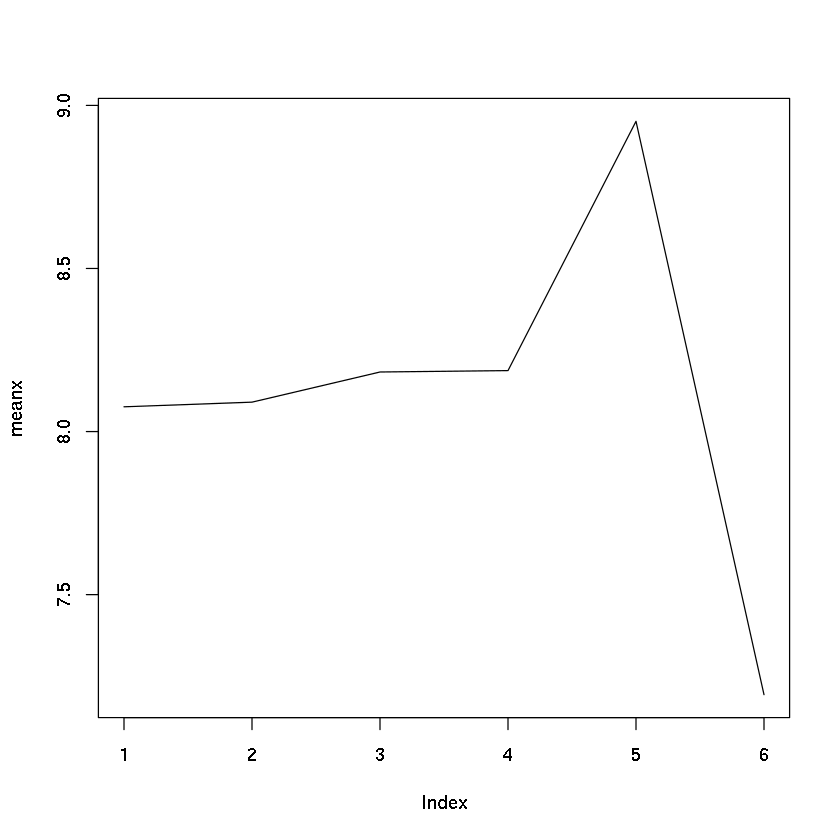

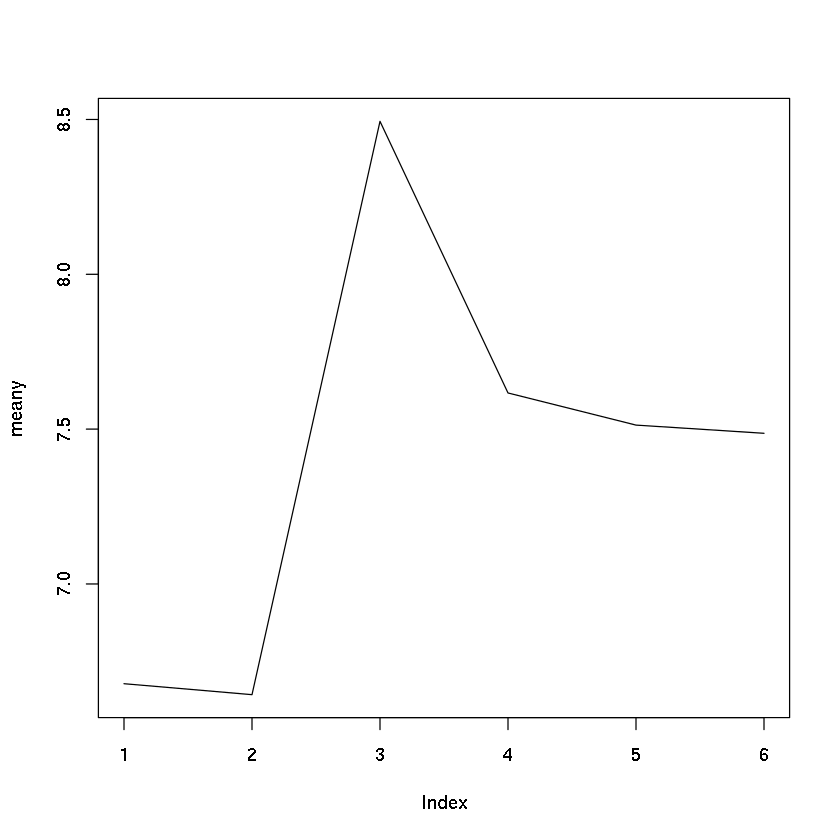

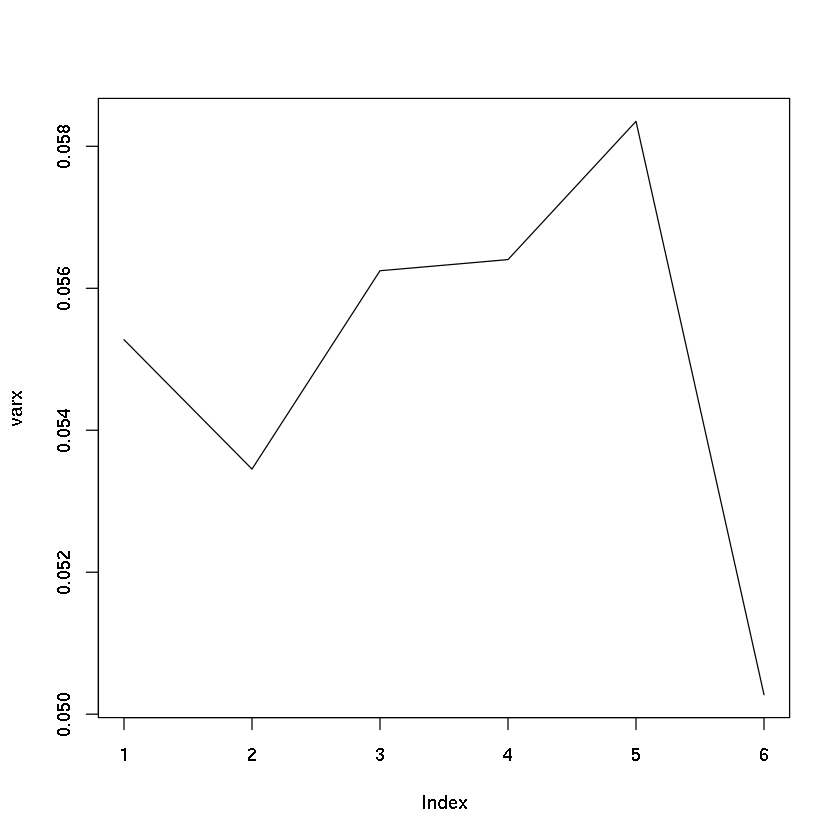

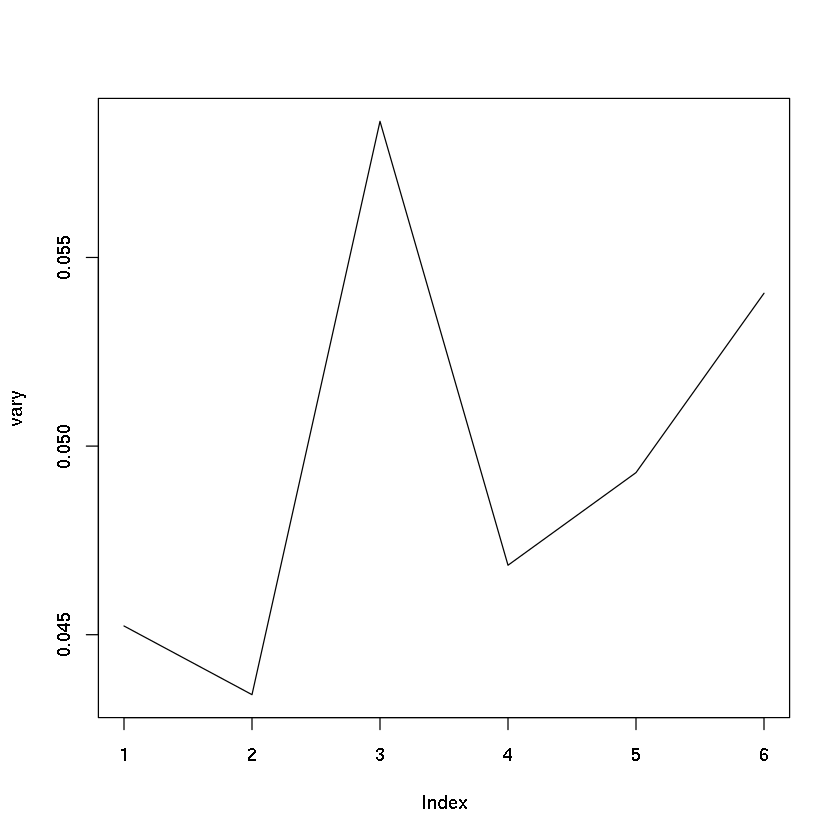

In [109]:
plot(meanx,type='l')
plot(meany,type='l')

plot(varx,type='l')
plot(vary,type='l')

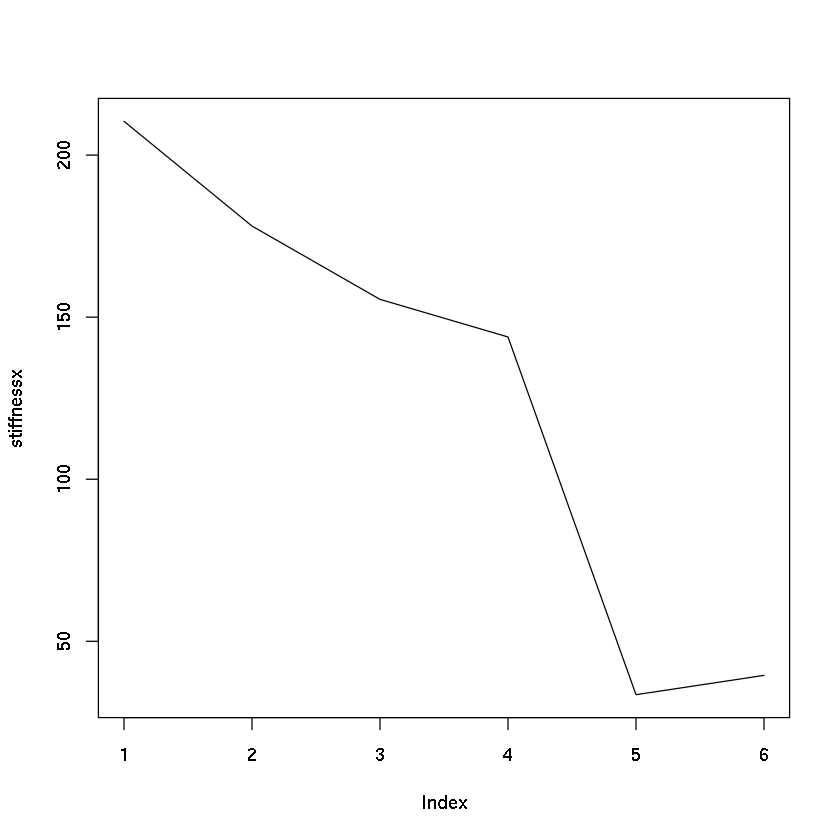

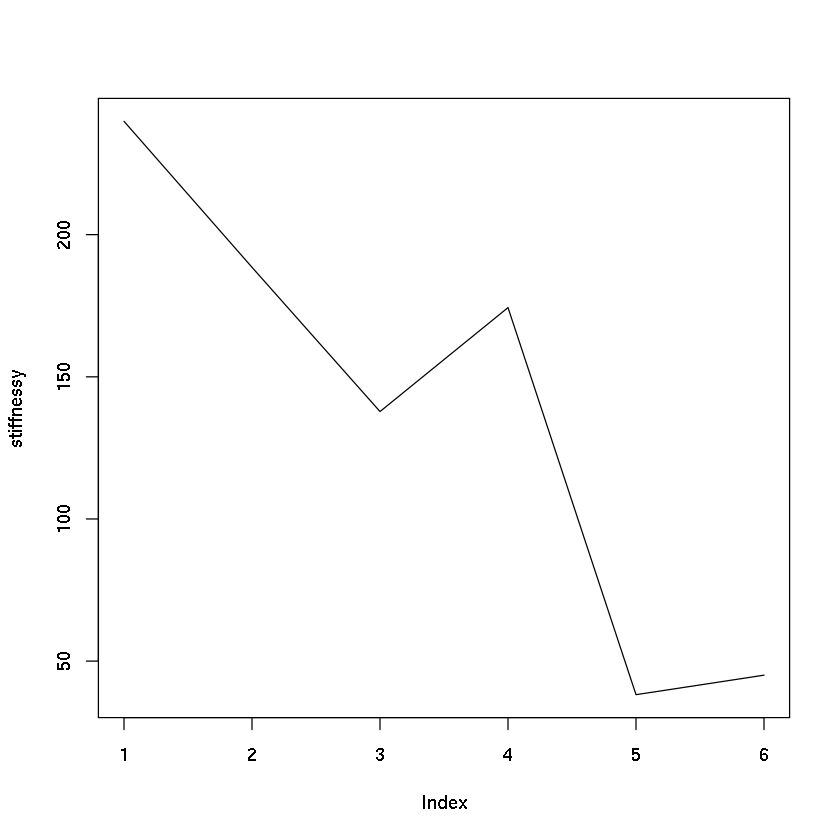

In [110]:
plot(stiffnessx, type='l')
plot(stiffnessy, type='l')

[1] 0.05527549 0.05345291 0.05624742 0.05640442 0.05835210 0.05027480

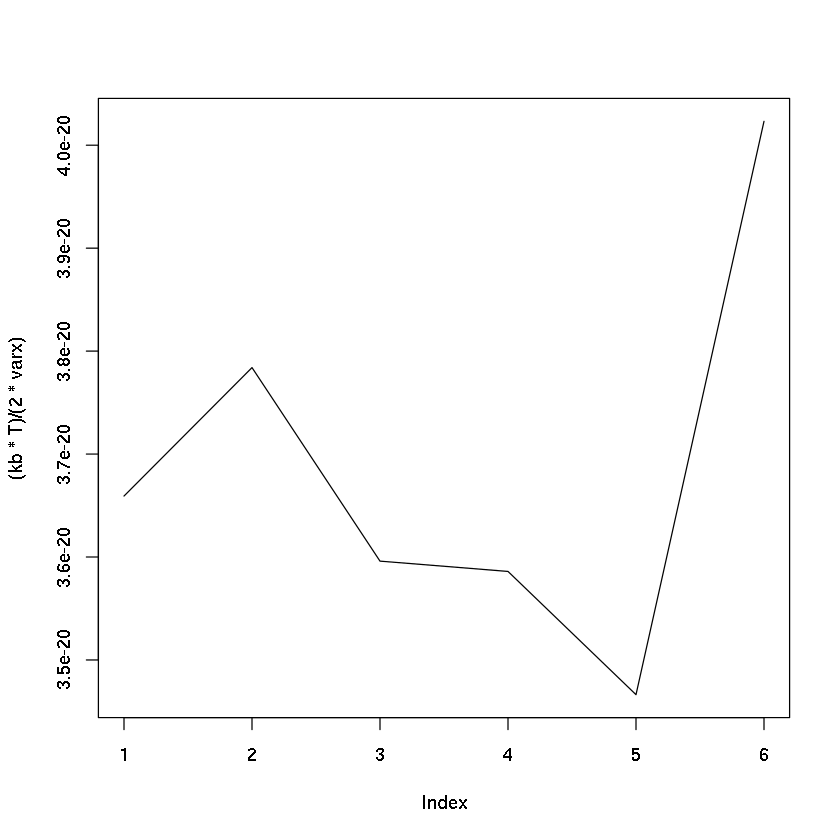

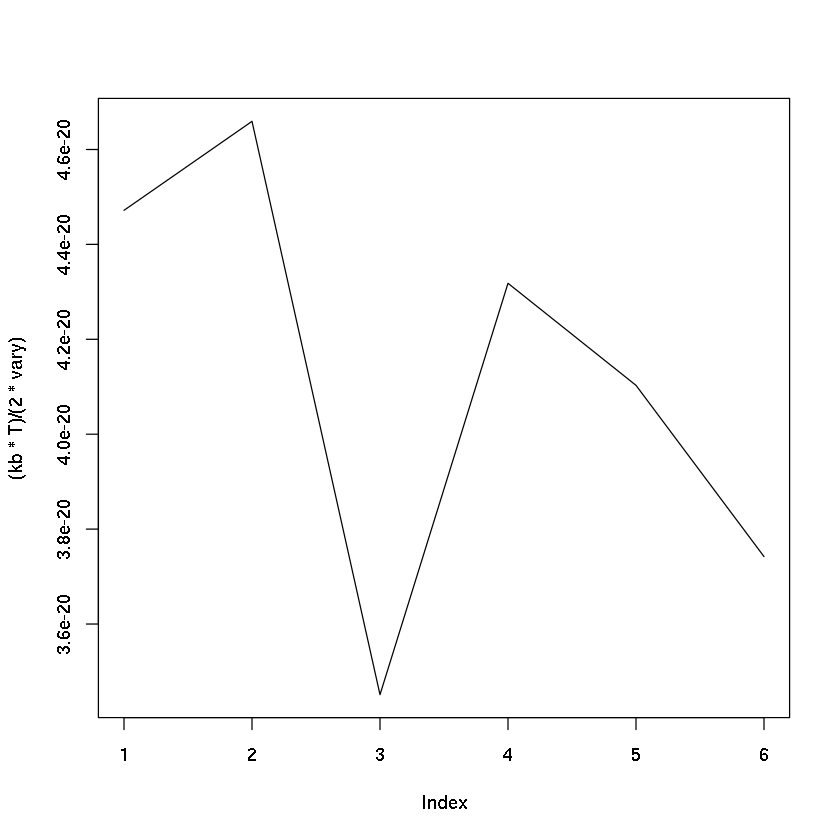

In [112]:
kb = 1.38064852 * 10^(-23)
T = 293
varx
plot((kb*T)/(2*varx), type='l')
plot((kb*T)/(2*vary), type = 'l')